<a href="https://www.kaggle.com/code/michellegreen7249/mental-health-in-the-tech-field?scriptVersionId=107781043" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

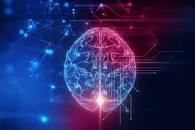

# Introduction to data

The following is an analysis of the survey data collected to measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

* Timestamp
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment  
  resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative
  consequences?
* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative
  consequences?
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your 
  workplace?
* comments: Any additional notes or comments

# Initial approach

When selecting this data set, I gave my approach a great deal of thought.  After reading a recent article regarding mental health of technical professionals, I decided this needed further exploration.  Here are the questions that I felt would be appropriate based upon the data collected.  
1. Are there differences in mental health concerns based upon gender?
2. Are there differences in mental health concernns based upon nature of employement position (i.e.remote, tech company, etc.)?
4. Are there difference in mental health concerns in other countries based on age and gender?

# Importing packages and dataset

Before starting any project it is important to import needed packages for python.  The next few lines of code include the import of the needed packages for us to clean this data.

In [1]:
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from tabulate import tabulate

In [6]:
df=pd.read_csv('../input/mental-health-in-tech-survey/survey.csv')

# Data Cleaning

1. We begin the data cleaning process by looking at what columns contained null values.

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

2. Now that I see that the columns state, self employed, work interfere and comments contain null values, I can input codes to clean those columns up.

3. Since we do not need the comments column to be considered in the analysis, we can drop that column by using this code.

In [8]:
df=df.drop("comments",axis=1)

4. Next I used some code that will show me if the comments column has been removed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

5. Next since we know that the work_interfere and self_employee columns have null values, we need to eliminate those.

In [10]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [11]:
df["work_interfere"]=df["work_interfere"].fillna("Sometimes")

In [12]:
df["self_employed"].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [13]:
df["self_employed"]=df["self_employed"].fillna("Sometimes")

In [14]:
df["state"].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [15]:
df=df.dropna(subset=['state'])

6. I can now drop the Timestamp column as it also not needed in my analysis.

In [16]:
df = df.drop(['Timestamp'], axis = 1)

7. Next we want to clean up the gender column, as many of the respondents to the survey did not have consistent answers.

In [17]:
df['Gender'].value_counts()

Male                  343
male                   90
M                      90
Female                 80
female                 44
F                      34
m                      18
f                      11
Make                    4
Cis Male                2
Female (trans)          2
Female                  2
Woman                   2
cis male                1
Mail                    1
A little about you      1
cis-female/femme        1
Female (cis)            1
msle                    1
Man                     1
p                       1
Trans woman             1
Male                    1
woman                   1
Genderqueer             1
Nah                     1
Femake                  1
non-binary              1
queer/she/they          1
Male (CIS)              1
Cis Female              1
Trans-female            1
maile                   1
Male-ish                1
femail                  1
Name: Gender, dtype: int64

8.  Now that I know exactly what responses were specifically received, I put in the following code to make all the responses consistent.

In [18]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

9. After I ran this code, I can now view what these column look like now but putting in the following code.

In [19]:
df['Gender'].value_counts()

Male      555
Female    179
Other      10
Name: Gender, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        744 non-null    int64 
 1   Gender                     744 non-null    object
 2   Country                    744 non-null    object
 3   state                      744 non-null    object
 4   self_employed              744 non-null    object
 5   family_history             744 non-null    object
 6   treatment                  744 non-null    object
 7   work_interfere             744 non-null    object
 8   no_employees               744 non-null    object
 9   remote_work                744 non-null    object
 10  tech_company               744 non-null    object
 11  benefits                   744 non-null    object
 12  care_options               744 non-null    object
 13  wellness_program           744 non-null    object
 14  seek_help

10.  The next step I took was to ensure that all of the values in the age column are appropriate and if not then input code to ensure they fall within the normal range of ages for those that were being surveyed.

In [21]:
df['Age'].value_counts()

 29     51
 33     46
 32     44
 35     40
 25     39
 31     39
 26     38
 30     37
 27     34
 28     34
 34     33
 40     28
 36     27
 23     27
 38     25
 24     23
 37     21
 43     19
 39     19
 41     15
 42     15
 46     12
 22      9
 45      9
 44      8
 21      7
 48      4
 50      4
 57      3
 56      3
 51      3
 49      3
 18      3
 55      2
 20      2
 60      2
 47      2
 19      2
 8       1
 53      1
-1       1
 11      1
 58      1
 5       1
 65      1
 62      1
 329     1
 54      1
-29      1
 72      1
Name: Age, dtype: int64

In [22]:
df["Age"].unique()

array([ 37,  44,  31,  33,  35,  42,  36,  29,  32,  46,  41,  34,  40,
        27,  50,  30,  38,  22,  24,  26,  23,  25,  28,  45,  18,  39,
       -29,  43,  21,  60,  54, 329,  55,  57,  58,  48,  47,  62,  65,
        56,  19,  49,   5,  20,  51,  53,   8,  11,  -1,  72])

In [23]:
df = df[df['Age'] > 18]
df= df[df['Age'] < 80]

11. Now that the formatting has been input, I want to check and make sure everything is ready for visualization.

In [24]:
df[df['Age'] > 80].head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


In [25]:
df['Age'].value_counts()

29    51
33    46
32    44
35    40
25    39
31    39
26    38
30    37
28    34
27    34
34    33
40    28
36    27
23    27
38    25
24    23
37    21
39    19
43    19
41    15
42    15
46    12
22     9
45     9
44     8
21     7
48     4
50     4
51     3
49     3
56     3
57     3
47     2
55     2
19     2
20     2
60     2
58     1
62     1
65     1
54     1
53     1
72     1
Name: Age, dtype: int64

12. The remote work, work interfere and the mental health consequences have also been cleaned and deserve checking to confirm they are clean.

In [26]:
df['remote_work'].value_counts()

No     507
Yes    228
Name: remote_work, dtype: int64

In [27]:
df['work_interfere'].value_counts()

Sometimes    427
Never        121
Rarely       108
Often         79
Name: work_interfere, dtype: int64

In [28]:
df['mental_health_consequence'].value_counts()

Maybe    298
No       271
Yes      166
Name: mental_health_consequence, dtype: int64

In [29]:
df.isna().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

13.  Now that all of the columns have been confirmed to be clean, I downloaded a clean copy of the csv file and uploaded it to Tableau.

In [30]:
df.to_csv('cleaned.csv')

# Visualizations

14.  The following are the images produced as a result of further filtering the data to answer our initial inquiries.

A. The first analysis was completed by using Tableau to find out the average age and which percentage of each gender participated in this survey. As we can see there was a higher percentage of males that participated in the survey.  The average age of the respondents was 32 for females, 34 for males and 30 for other.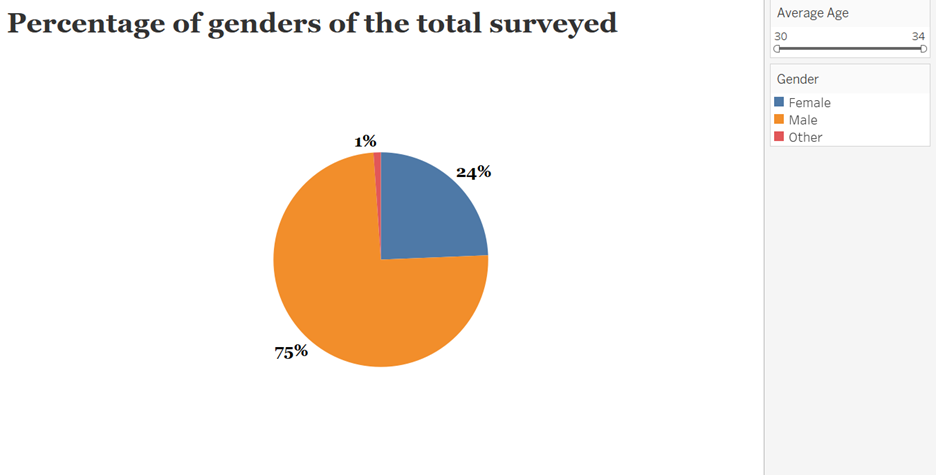

B.  From this image we can see that the number of respondents survey that were remote workers that had been treated for a mental health condition.   272 of the respondends that were remote workers had not sought treatment for mental health concerns and 130 did. 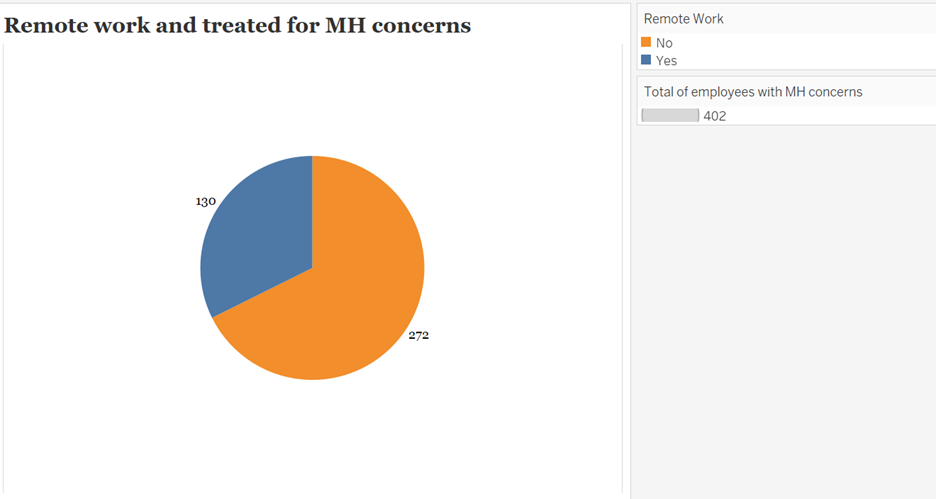

C.  This image shows that of those surveyed that were working for tech companies, that had sought treatment for mental health concerns was much higher.  
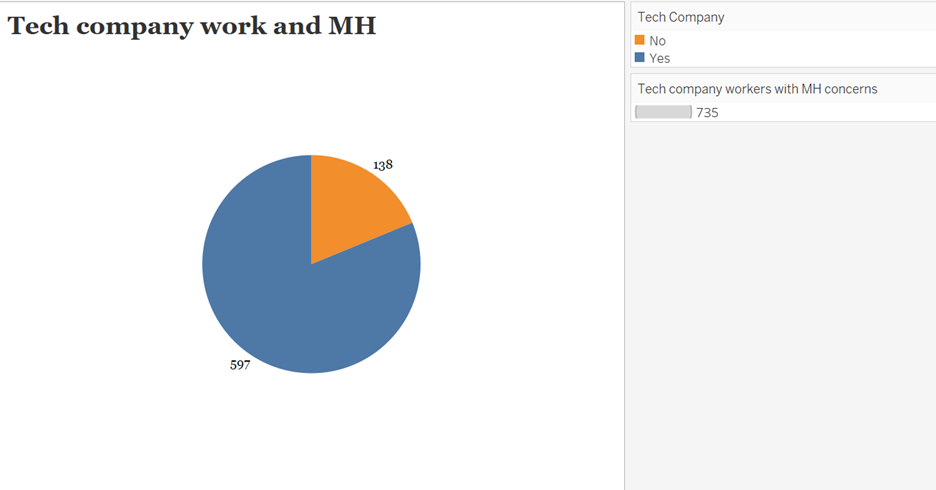

D.  This image was generated after analyzying which respondent of the survey that had been treated for mental health concerns also had a family history of mental illness. 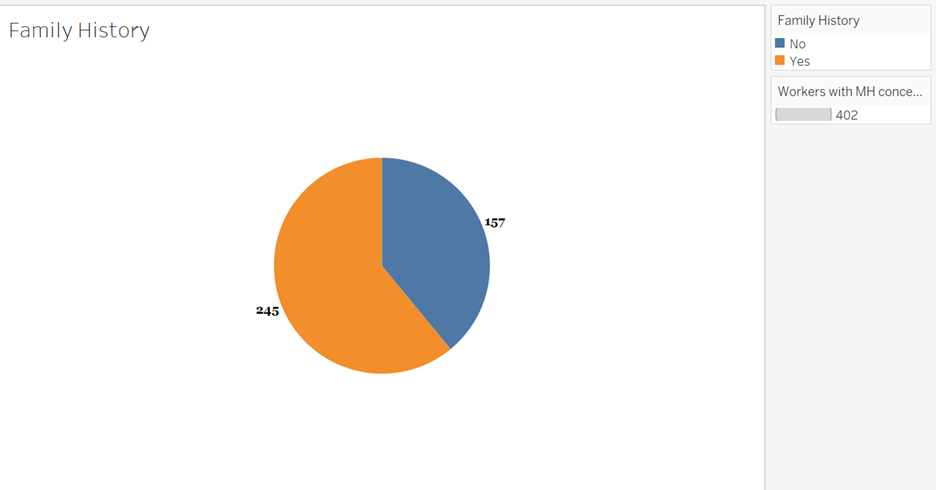

E.  This visualization was generating by analyzing the data to determine which states have the most respondents with mental health concerns. 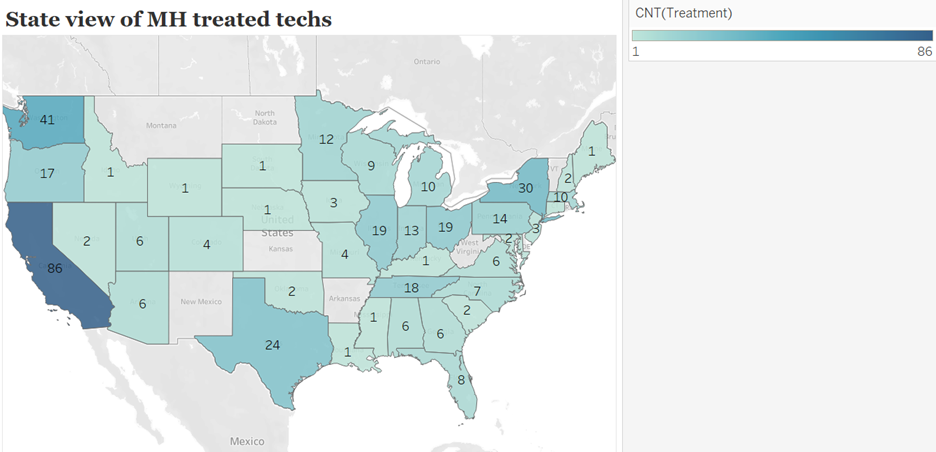

# Insights
1.  We can see that most of the respondents were males between the average ages of 32-34.  
2.  Also this data shows us that those that work at tech companies as compared to those that work remotely, or are self-employed seem to have had reported mental health concerns.
3. California seems to have the most respondents reporting being treated for mental health issues.